## Quantum Finance - Agentes de Investimento Baseados em Deep Reinforcement Learning

# Part 1 - Problema de negocio

### 1. Introdução e Problemática

A automação da tomada de decisão em investimentos é uma das áreas mais inovadoras e desafiadoras do uso de inteligência artificial no mercado financeiro. Algoritmos de **Aprendizado por Reforço Profundo (Deep Reinforcement Learning, DRL)** permitem a criação de agentes autônomos capazes de aprender estratégias de negociação a partir de dados históricos, simulando o comportamento de um operador profissional que busca maximizar o retorno ajustado ao risco ao longo do tempo.

Neste projeto, desenvolvemos e comparamos **dois robôs de investimento baseados em redes neurais recorrentes** para operar no mercado de ações brasileiro. Cada robô emprega uma arquitetura distinta, combinando camadas LSTM e GRU, otimizadas para capturar padrões temporais complexos dos preços dos ativos.

### 2. Diferencial do Projeto: Dois Robôs de Trading com Deep RL

Para analisar o impacto do design da arquitetura neural no desempenho dos agentes, implementamos **dois agentes (robôs) de DQN**:

#### **Robô 1: DQN LSTM-GRU Compacto**

* Arquitetura sequencial com camadas LSTM e GRU empilhadas
* Estrutura enxuta, focada em extrair padrões relevantes de curto e médio prazo
* Indicado para cenários com menor volume de dados e menor risco de overfitting

#### **Robô 2: DQN LSTM-GRU Profundo e Regularizado**

* Arquitetura mais profunda, com múltiplas camadas LSTM e GRU, além de normalização em batch e dropout para robustez
* Capaz de capturar dinâmicas de mercado mais complexas e evitar overfitting por meio de regularização
* Ideal para séries históricas mais longas, maior variedade de ativos ou estratégias sofisticadas

Ambos os agentes seguem o paradigma de **Q-Learning com função de aproximação por rede neural**. Eles recebem, a cada etapa, o estado do mercado (preços normalizados, posição, contexto) e aprendem iterativamente as melhores decisões de comprar, vender ou manter cada ativo.

### 3. Motivação e Objetivo

* **Motivação**: Demonstrar como técnicas de Deep RL podem automatizar e potencializar a gestão ativa de carteiras, reduzindo viés humano e operando de maneira sistemática, data-driven.
* **Objetivo**: Construir, treinar e comparar o desempenho de dois agentes inteligentes capazes de aprender estratégias de trading nos ativos **VALE3.SA**, **PETR4.SA** e **BRFS3.SA**, maximizando o retorno e otimizando o risco ao longo do tempo.

> **Resumo**:

> Este estudo compara, na prática, duas arquiteturas de agente de trading baseadas em redes neurais profundas, destacando os impactos de diferentes escolhas de modelagem no resultado financeiro e operacional das estratégias de RL aplicadas ao mercado de ações brasileiro.

# Part 2 - Verificação GPU (Nvidia)

In [1]:
# Mostra informações da GPU disponível (no Colab/Jupyter, use !nvidia-smi)
!nvidia-smi

Fri Jun 27 21:58:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.55.01              Driver Version: 576.40         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   63C    P8              9W /   80W |     372MiB /   4096MiB |     13%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Importa as principais bibliotecas de Deep Learning
import keras
import tensorflow as tf

# Exibe a versão do TensorFlow e as GPUs detectadas pelo TensorFlow
print("Versão do TensorFlow:", tf.__version__)
print("GPUs disponíveis:", tf.config.list_physical_devices('GPU'))

# Verifica se o TensorFlow encontrou alguma GPU e exibe mensagem correspondente
if tf.config.list_physical_devices('GPU'):
    print("✅ GPU encontrada e disponível!")
else:
    print("❌ Nenhuma GPU encontrada. Usando apenas CPU.")

2025-06-27 21:58:14.747546: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-27 21:58:15.034957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751072295.144742     398 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751072295.177838     398 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751072295.414128     398 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Versão do TensorFlow: 2.19.0
GPUs disponíveis: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
✅ GPU encontrada e disponível!


In [4]:
# Verificar GPU disponível com Keras
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7814623950083040553
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1853253223
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11117035671541562236
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


I0000 00:00:1751072307.857379     398 gpu_device.cc:2019] Created device /device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


# Part 3 - Importando bibliotecas

In [5]:
# Bibliotecas de análise e manipulação de dados
import pandas as pd
import numpy as np

# Machine Learning e Pré-processamento
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Deep Learning (TensorFlow e Keras)
import tensorflow as tf
from tensorflow import keras

# Análise técnica (indicadores financeiros)
import ta

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Utilitários de programação e RL
from collections import deque
import random

In [6]:
# Base dados
df = pd.read_csv('dados_acoes_tratado_mineradoras2.csv')  # Troque para o caminho do seu CSV
df

,Date,Open,High,Low,Close,Volume,Ticker
0,2005-01-03 00:00:00-02:00,11.662088,11.814534,11.328232,11.410553,4057600,VALE3.SA
1,2005-01-04 00:00:00-02:00,11.412079,11.433421,10.902910,10.945596,4430400,VALE3.SA
2,2005-01-05 00:00:00-02:00,10.983707,11.041635,10.732171,10.869372,6939200,VALE3.SA
3,2005-01-06 00:00:00-02:00,10.876993,10.930348,10.518746,10.823637,3313600,VALE3.SA
4,2005-01-07 00:00:00-02:00,10.956266,11.280975,10.899861,11.113285,5248000,VALE3.SA
...,...,...,...,...,...,...,...
70363,2025-06-17 00:00:00-04:00,58.099998,58.160000,57.000000,57.009998,2878000,RIO
70364,2025-06-18 00:00:00-04:00,57.150002,57.279999,56.869999,56.939999,2145000,RIO
70365,2025-06-20 00:00:00-04:00,56.400002,56.509998,55.720001,55.889999,4665700,RIO
70366,2025-06-23 00:00:00-04:00,55.669998,57.130001,55.639999,57.090000,3183600,RIO


# Part 4 - Pré-processamento dos dados

In [6]:
# Converte a coluna 'Date' para o tipo datetime do pandas
df['Date'] = pd.to_datetime(df['Date'])


/tmp/ipykernel_689617/2394721818.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
# Ordena o DataFrame por Ticker e Data (importante para séries temporais)
df = df.sort_values(['Ticker', 'Date'])

In [8]:
# Define as colunas de features numéricas para normalização
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

# Cria e ajusta o MinMaxScaler usando os dados originais
scaler = MinMaxScaler()

# Normaliza as colunas numéricas no DataFrame
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# O objeto scaler pode ser usado depois para desnormalizar se necessário
scaler

MinMaxScaler()

# Part 5 - Feature engineering

In [9]:
# Tenta criar o OneHotEncoder da forma mais moderna (pós-scikit-learn 1.2); caso contrário, usa o parâmetro antigo
try:
    encoder = OneHotEncoder(sparse_output=False)  # scikit-learn >= 1.2
except TypeError:
    encoder = OneHotEncoder(sparse=False)         # scikit-learn < 1.2

# Ajusta o encoder e transforma os tickers em variáveis one-hot (matriz binária)
tickers_oh = encoder.fit_transform(df[['Ticker']])
tickers_names = encoder.categories_[0]

# Cria um DataFrame com as colunas one-hot, mantendo o mesmo índice do DataFrame original
df_onehot = pd.DataFrame(
    tickers_oh,
    columns=[f"Ticker_{t}" for t in tickers_names],
    index=df.index
)

# Concatena as novas colunas one-hot ao DataFrame original
df = pd.concat([df, df_onehot], axis=1)

# Exibe o DataFrame final com as colunas one-hot dos tickers
df

# Part 6 - Analise de dados

In [10]:
# Junte ao dataframe
df_onehot = pd.DataFrame(tickers_oh, columns=[f"Ticker_{t}" for t in tickers_names], index=df.index)
df_onehot

,Ticker_BHP,Ticker_BRFS3.SA,Ticker_CMIN3.SA,Ticker_CSAN3.SA,Ticker_CVX,Ticker_EGIE3.SA,Ticker_ELET3.SA,Ticker_GGBR4.SA,Ticker_PETR4.SA,Ticker_PRIO3.SA,Ticker_RIO,Ticker_SHEL,Ticker_SLCE3.SA,Ticker_VALE3.SA,Ticker_XOM
60066,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60067,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60068,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60069,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60070,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


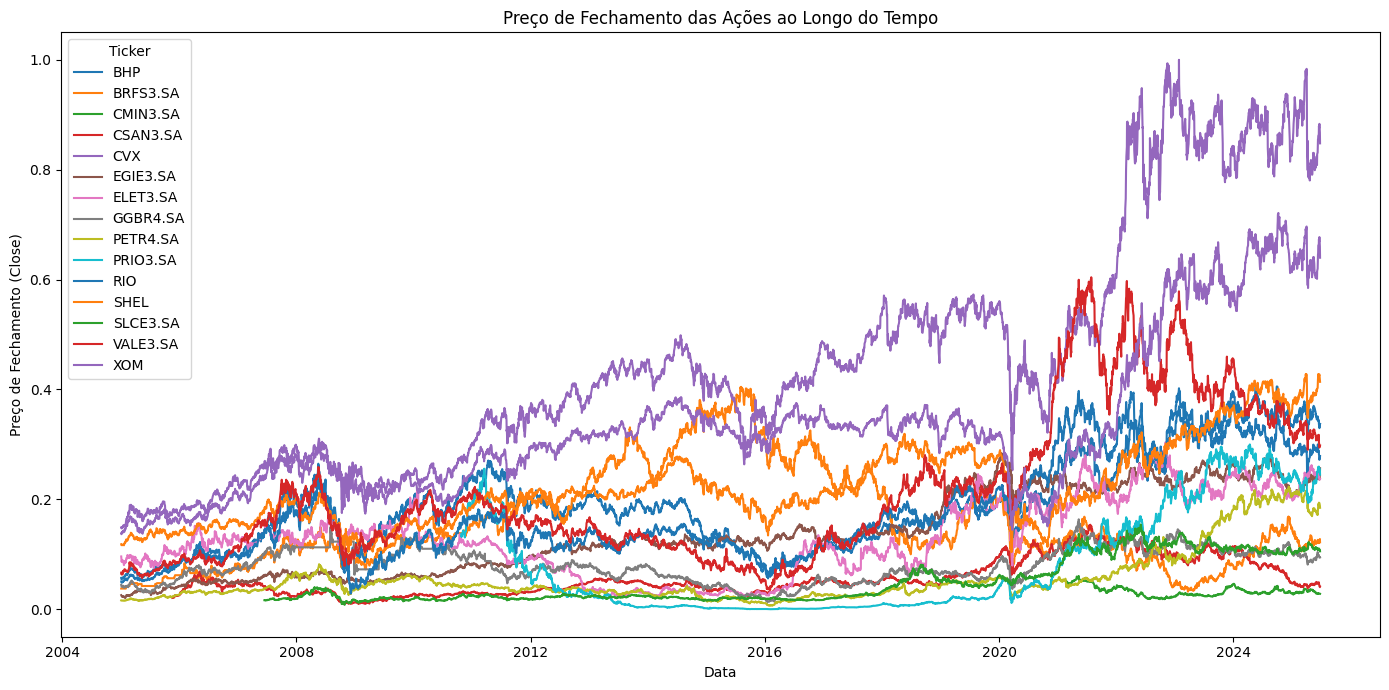

In [11]:
# Seleciona todos os tickers únicos do DataFrame
tickers = df['Ticker'].unique()  # Defina os tickers aqui!

plt.figure(figsize=(14, 7))

# Para cada ticker, plota a curva de fechamento ao longo do tempo
for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker]
    plt.plot(df_ticker['Date'], df_ticker['Close'], label=ticker)

# Ajusta título e rótulos dos eixos
plt.title('Preço de Fechamento das Ações ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (Close)')

# Coloca legenda e embeleza o gráfico
plt.legend(title='Ticker')
plt.grid(True, linestyle='--', alpha=0.5)  # Grid leve melhora leitura temporal
plt.tight_layout()
plt.show()

**Análise**

O gráfico mostra a evolução do preço de fechamento (normalizado) de várias ações de empresas brasileiras e estrangeiras, com destaque para mineradoras, petroleiras e outros setores estratégicos. O eixo **x** representa o tempo (de 2004 até 2025) e o eixo **y** traz os valores dos preços de fechamento já normalizados (por MinMaxScaler, entre 0 e 1).

**Principais Pontos Observados**

1. **Divergência de Performance entre Ativos**

   * Algumas empresas apresentam tendências de alta de longo prazo, enquanto outras oscilam lateralmente ou até apresentam quedas. Isso mostra como o setor, estratégia empresarial e o contexto econômico global impactam o preço das ações de cada companhia.

2. **Mineradoras de Destaque**

   * **BHP, RIO, VALE3.SA**: Tradicionalmente, mineradoras acompanham o ciclo das commodities. O gráfico mostra momentos de forte valorização e períodos de lateralização, refletindo o boom das commodities, crises e recuperações.
   * **VALE3.SA** mostra picos (ex: recuperação após 2015/2016), mas também quedas abruptas que podem estar relacionadas a eventos setoriais, desastres ou retração econômica.

3. **Empresas de Petróleo e Energia**

   * **PETR4.SA, XOM, SHEL, PRIO3.SA, CVX**: Empresas de petróleo sofrem influência do preço internacional do barril, crises políticas e movimentos do dólar. Notam-se oscilações abruptas (2020, por exemplo, com o choque de preços devido à pandemia).

4. **Volatilidade e Crises**

   * Momentos de alta volatilidade, como 2008 (crise financeira global), 2015/2016 (crise das commodities e política brasileira) e 2020 (COVID-19) aparecem como “quedas” ou oscilações bruscas em quase todos os ativos.
   * **PRIO3.SA** e **SLCE3.SA** (agro, energia renovável) mostram padrões diferenciados, podendo refletir menor correlação com crises específicas de mineração e petróleo.

5. **Empresas Brasileiras vs. Estrangeiras**

   * Ações como **BHP, XOM, SHEL, RIO** parecem ter tido melhor desempenho relativo no longo prazo, sugerindo resiliência global, enquanto algumas brasileiras enfrentaram maiores dificuldades e oscilações.

6. **Tendência de Recuperação Pós-Crise**

   * Em vários ativos, especialmente de 2020 em diante, observa-se forte recuperação. O movimento pós-pandemia pode ter sido alavancado por estímulos globais e aumento da demanda por commodities.

**Insights e Possíveis Decisões**

* **Diversificação é fundamental:** O gráfico demonstra que diferentes setores e geografias reagem de formas distintas a eventos globais e locais.
  
* **Timing e eventos externos:** O investidor que opera apenas buy & hold em commodities está exposto a grandes oscilações. Estratégias sistemáticas, como agentes de RL, podem capturar movimentos de alta e proteger contra quedas abruptas.

  
* **Atenção ao contexto macro:** Oscilações em empresas de commodities costumam antecipar ou refletir ciclos econômicos globais.

**Recomendações para Próximas Análises**

* Plotar o **lucro acumulado** do agente RL versus o buy & hold por ativo.
* Adicionar métricas como **volatilidade histórica**, **drawdown** e **sharpe ratio** por ticker.
* Analisar **correlação** entre ativos para explorar sinergias e estratégias de hedge.

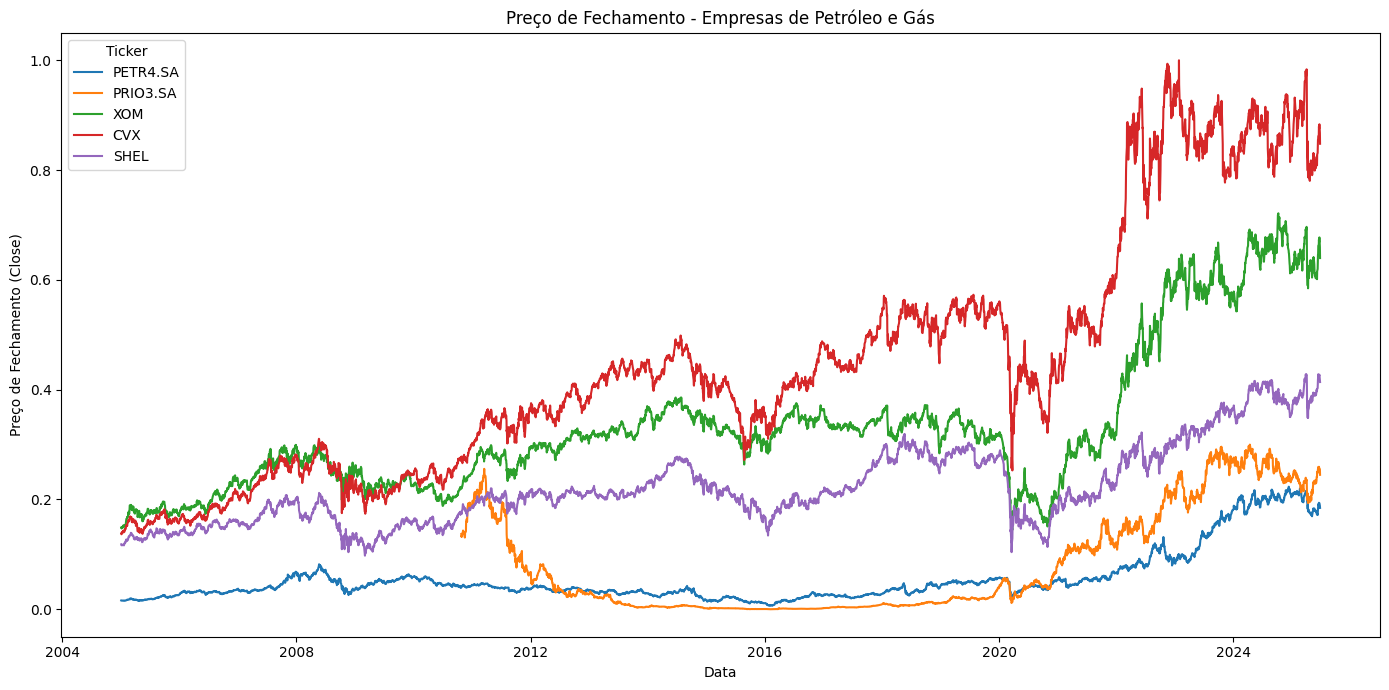

In [12]:
# Obtém a lista de tickers únicos do DataFrame
tickers = df['Ticker'].unique()

# Define o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Plota a curva de preço de fechamento para cada ticker
for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker]
    plt.plot(df_ticker['Date'], df_ticker['Close'], label=ticker)

# Configurações finais do gráfico
plt.title('Preço de Fechamento das Ações ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (Close)')
plt.legend(title='Ticker')
plt.grid(False)         # Remove o grid de fundo
plt.tight_layout()      # Ajusta layout para evitar cortes
plt.show()

**Análise**

O gráfico compara o comportamento dos preços das ações de cinco grandes empresas do setor de petróleo e gás (**PETR4.SA**, **PRIO3.SA**, **XOM**, **CVX** e **SHEL**) ao longo dos anos, de 2004 até 2025.

* **Cada linha** representa uma empresa diferente.
* O eixo **X** mostra o tempo (anos).
* O eixo **Y** mostra o preço das ações (em escala normalizada para facilitar a comparação).

**O que dá para perceber olhando para o gráfico?**

1. **Subidas e Descidas dos Preços**

   * Todas as empresas passaram por momentos de alta (valorização das ações) e baixa (quedas nos preços). Isso é normal nesse setor, pois ele depende muito do preço do petróleo, que muda bastante ao longo do tempo.

2. **Crises e Recuperações**

   * Dá para ver quedas bruscas em alguns momentos (por exemplo, por volta de 2020), que coincidem com crises mundiais como a pandemia do COVID-19, onde o consumo de petróleo caiu muito.
   * Após essas crises, algumas empresas conseguiram se recuperar e até superar o preço anterior.

3. **Diferença entre Empresas**

   * Empresas estrangeiras como **CVX** (Chevron) e **XOM** (ExxonMobil) mostram uma recuperação mais forte e consistente ao longo do tempo, principalmente a partir de 2021.
   * **PETR4.SA** (Petrobras) tem desempenho mais “tímido”, ou seja, cresce menos e é mais afetada por crises.
   * **SHEL** e **PRIO3.SA** (empresas com foco em gás e petróleo “offshore”) têm um crescimento intermediário.

4. **Tendência de Longo Prazo**

   * Apesar das oscilações, a maioria das empresas conseguiu crescer ao longo do tempo, mostrando que quem investiu e esperou alguns anos teve ganhos, especialmente nas empresas americanas.


**Resumo Prático:**

* **Investir em petróleo é montanha-russa:** O preço sobe e desce bastante, mas a tendência de longo prazo pode ser positiva para as grandes empresas globais.
  
* **Crises afetam todo mundo, mas nem todas as empresas reagem igual:** Empresas americanas parecem se recuperar melhor que a brasileira Petrobras.

* **Olhando no tempo certo, todo investidor passa por altos e baixos, mas paciência pode trazer bons resultados.**


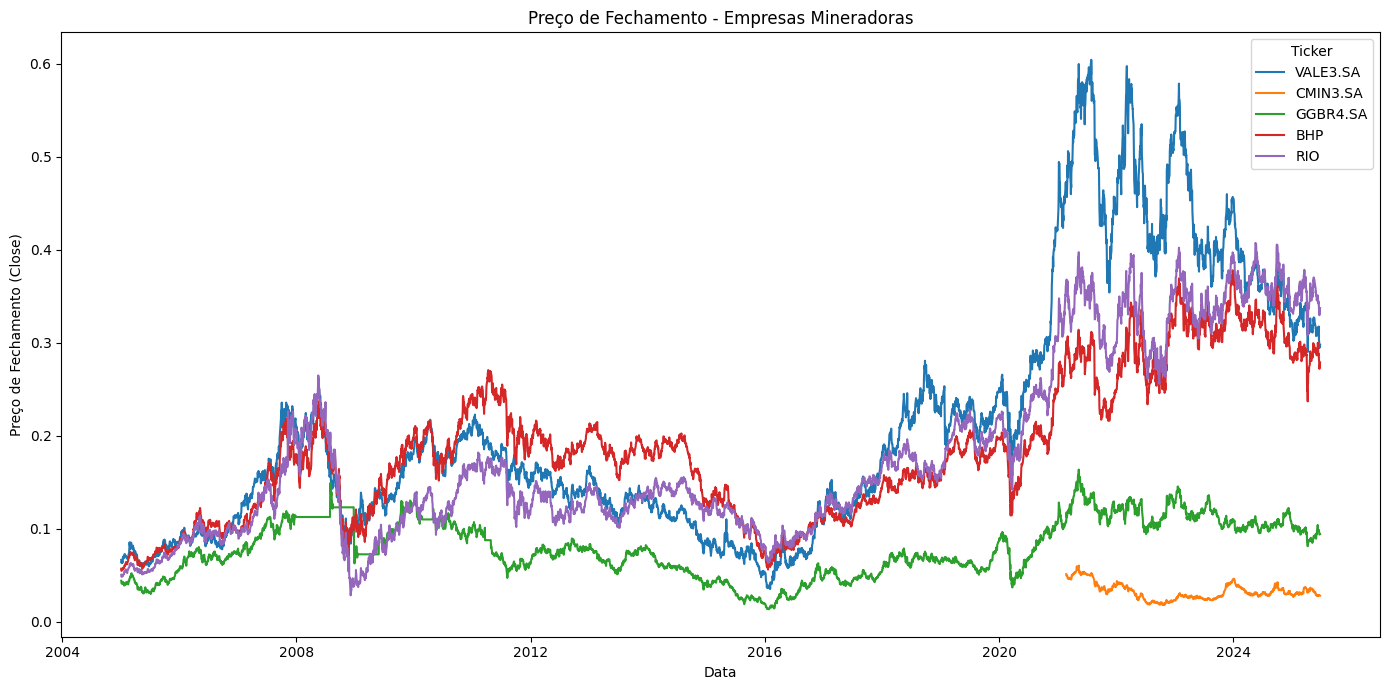

In [13]:
# Lista de tickers das empresas mineradoras de interesse
tickers_mineradoras = ["VALE3.SA", "CMIN3.SA", "GGBR4.SA", "BHP", "RIO"]

plt.figure(figsize=(14, 7))

# Plota o preço de fechamento ao longo do tempo para cada mineradora presente no DataFrame
for ticker in tickers_mineradoras:
    if ticker in df['Ticker'].values:
        df_ticker = df[df['Ticker'] == ticker]
        plt.plot(df_ticker['Date'], df_ticker['Close'], label=ticker)

# Títulos e legendas
plt.title('Preço de Fechamento - Empresas Mineradoras')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (Close)')
plt.legend(title='Ticker')
plt.grid(False)         # Sem grid, para visual mais limpo
plt.tight_layout()
plt.show()

**Análise**
  
O gráfico acompanha o preço das ações das principais mineradoras do Brasil e do mundo ao longo do tempo (2004 a 2025).

* **Cada linha**: uma mineradora diferente.
* **Eixo X**: anos.
* **Eixo Y**: preço da ação (normalizado).

**Principais Observações do Gráfico:**

1. **Oscilações intensas**

   * Todas as mineradoras passam por períodos de alta e baixa, mas a volatilidade (os "sobe e desce") é bem visível, principalmente em momentos de crise mundial ou boom das commodities.

2. **VALE3.SA lidera a volatilidade**

   * A ação da **Vale** tem picos de alta muito expressivos, especialmente entre 2020 e 2022, indicando períodos em que o preço do minério de ferro disparou (influência de China, pandemia, demanda mundial).
   * Depois dos picos, a VALE também mostra quedas rápidas, refletindo a sensibilidade do setor a notícias e mudanças globais.

3. **BHP e RIO (australianas/inglesas) são mais estáveis**

   * Essas empresas apresentam crescimento mais consistente, com menos variações abruptas, mostrando resiliência global e atuação diversificada.

4. **GGBR4.SA (Gerdau) e CMIN3.SA (CSN Mineração)**

   * Apresentam crescimento, mas com menor intensidade e menos volatilidade que a VALE.
   * A CSN Mineração (CMIN3.SA) tem trajetória mais “linear”, sugerindo menor risco — mas também menores picos de valorização.

5. **Impactos Globais**

   * Quedas bruscas em 2008 e 2015 refletem crises financeiras e de commodities, afetando todo o setor.
   * A recuperação após 2020 indica retomada da demanda por metais e forte valorização das mineradoras.

**Resumo para leigos:**

* **Ações de mineradoras são sensíveis ao mercado mundial**: notícias sobre China, EUA e commodities afetam fortemente os preços.
* **Vale é a mais “emocionante”**: potencial de grandes lucros, mas também riscos altos.
* **Empresas globais (BHP, RIO) são mais estáveis**, ideais para quem prefere menos sustos.
* **Boas oportunidades aparecem após quedas grandes**, mas é preciso ter paciência (e nervos de aço!).

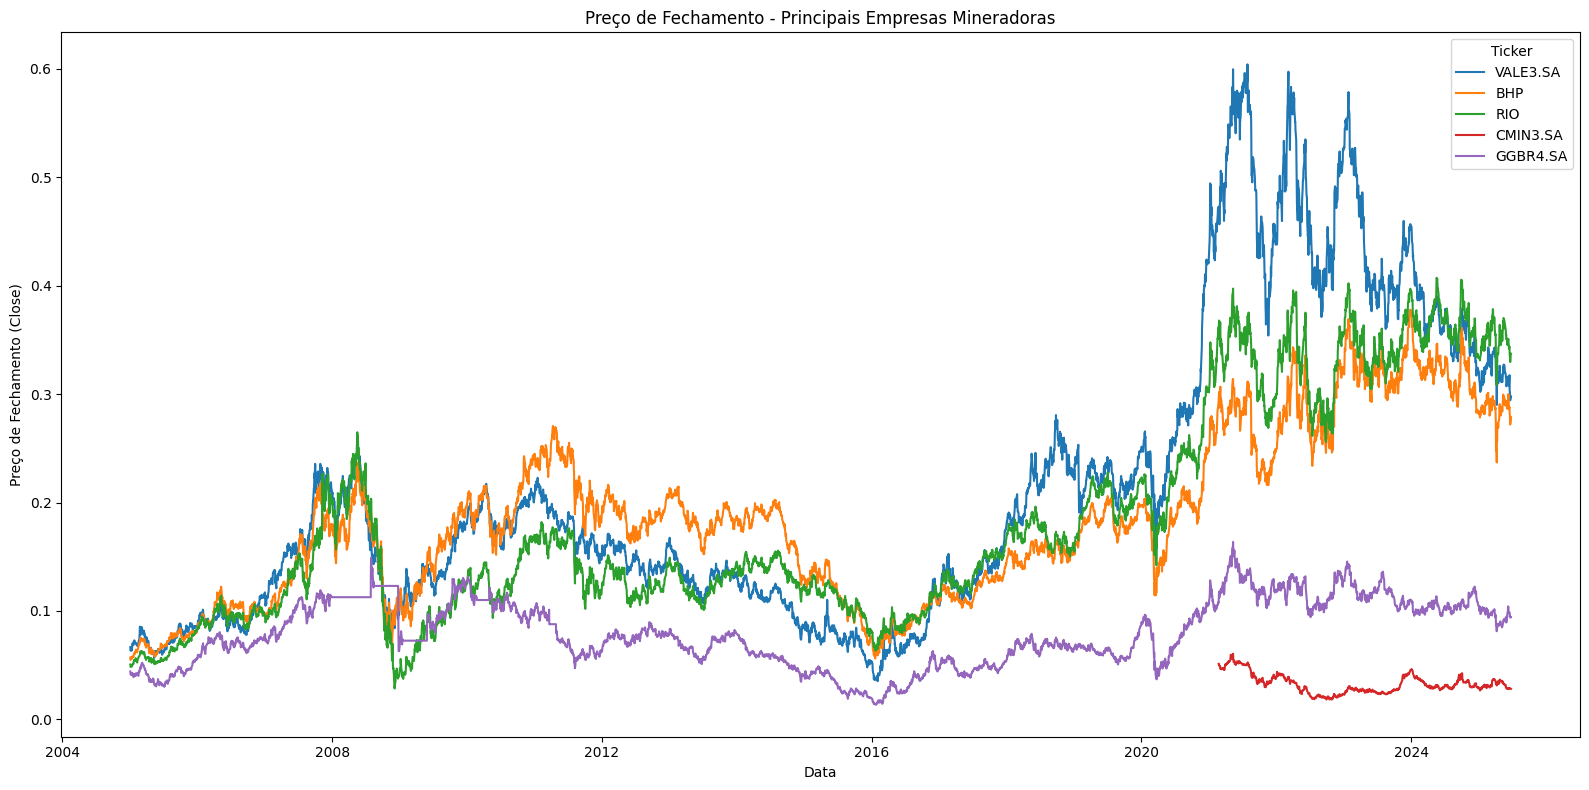

In [14]:
# Lista das principais mineradoras globais e brasileiras
tickers_mineradoras_top = [
    "VALE3.SA",    # Vale
    "BHP",         # BHP Group
    "RIO",         # Rio Tinto
    "GLNCY",       # Glencore
    "FCX",         # Freeport-McMoRan
    "ANGPY",       # Anglo American
    "CMIN3.SA",    # CSN Mineração
    "GGBR4.SA",    # Gerdau
    "CSNA3.SA"     # CSN
]

plt.figure(figsize=(16, 8))

# Plota o preço de fechamento ao longo do tempo para cada mineradora disponível no DataFrame
for ticker in tickers_mineradoras_top:
    if ticker in df['Ticker'].values:
        df_ticker = df[df['Ticker'] == ticker]
        plt.plot(df_ticker['Date'], df_ticker['Close'], label=ticker)

# Títulos, legendas e ajustes visuais
plt.title('Preço de Fechamento - Principais Empresas Mineradoras')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (Close)')
plt.legend(title='Ticker')
plt.grid(False)
plt.tight_layout()
plt.show()

**Análise**

**Principais Insights do Gráfico:**

1. **VALE3.SA (Vale) se destaca**

   * A Vale apresenta fortes oscilações e os maiores picos de valorização, principalmente após 2020.
   * Isso reflete grandes oportunidades, mas também grandes riscos para quem investe nela.

2. **BHP e RIO (mineradoras globais)**

   * Mostram crescimento constante e consistente ao longo dos anos.
   * São menos voláteis que a Vale, mostrando resiliência e estabilidade no mercado global.

3. **CMIN3.SA e GGBR4.SA (empresas brasileiras)**

   * Têm preços bem mais baixos e oscilações mais suaves.
   * Apresentam crescimento, mas em um patamar menor, o que pode indicar menor exposição a grandes oscilações de mercado ou menor influência internacional.

4. **Impactos Globais e Crises**

   * Todos os ativos mostram quedas próximas a 2008 (crise financeira global) e recuperação nos anos seguintes.
   * Após 2020, há um movimento de forte valorização nas principais mineradoras, muito provavelmente pela alta da demanda mundial por minério.

**Resumo para Não Técnicos**

* **Mineradoras podem ser investimentos lucrativos, mas voláteis** — especialmente VALE3.SA, que tem altos e baixos acentuados.
* **BHP e RIO são opções mais “tranquilas”**, com crescimento constante e menos sustos no caminho.
* **Empresas menores (CMIN3.SA, GGBR4.SA) têm crescimento mais discreto, mas também menos risco**.
* **Grandes crises e movimentos globais afetam TODAS as mineradoras**, mas cada uma reage de um jeito, dependendo do tamanho, da diversificação e da posição no mercado mundial.

# Part 7 - Função para construir o estado

- Função de estado para o agente

In [15]:
# função de estado: preços + ticker one-hot + posição atual
def get_state(row, posicao):
    features = row[feature_cols].tolist()
    ticker_features = row[[col for col in df.columns if col.startswith('Ticker_')]].tolist()
    return np.array(features + ticker_features + [posicao], dtype=np.float32)

# Part 8 - Parâmetros Agente RNN

In [16]:
# Para exemplo, use só um ticker (ex: VALE3.SA)
ticker_escolhido = df['Ticker'].unique()[0]
df_ticker = df[df['Ticker'] == ticker_escolhido].sort_values('Date').reset_index(drop=True)

# Guarde preços reais (opcional)
df_ticker['Close_real'] = df_ticker['Close']

In [17]:
# Define as colunas numéricas (features) que serão utilizadas como entrada para o modelo
FEATURE_COLS = ['Open', 'High', 'Low', 'Close', 'Volume']

In [18]:
# Normalizar (opcional, mas recomendado)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_ticker[FEATURE_COLS] = scaler.fit_transform(df_ticker[FEATURE_COLS])

In [19]:
# Função para construir sequências de estados e próximos estados para modelos sequenciais (LSTM/GRU)
def build_sequences(df, seq_len, feature_cols):
    states, next_states, dates = [], [], []
    for i in range(seq_len, len(df)):
        # Estado atual: janela dos últimos 'seq_len' dias
        state = df.iloc[i-seq_len:i][feature_cols].values  # shape: (SEQ_LEN, num_features)
        # Próximo estado: janela deslocada em +1
        next_state = df.iloc[i-seq_len+1:i+1][feature_cols].values
        states.append(state)
        next_states.append(next_state)
        dates.append(df.iloc[i]['Date'])  # Data referente ao próximo estado
    return np.array(states), np.array(next_states), dates

# Define o tamanho da janela para as sequências (quantos dias/steps olhar para trás)
SEQ_LEN = 10

# Gera os arrays de estados e próximos estados para o modelo
states, next_states, dates = build_sequences(df_ticker, SEQ_LEN, FEATURE_COLS)
print("states shape:", states.shape)  # Deve ser (N, SEQ_LEN, num_features)

states shape: (5141, 10, 5)


# Part 10 - Agente 1

In [20]:
# Garante que as features numéricas estão definidas para a criação das sequências
FEATURE_COLS = ['Open', 'High', 'Low', 'Close', 'Volume']  # (defina aqui caso ainda não tenha feito)

# Usa a função build_sequences para criar os arrays de estados e próximos estados para o modelo sequencial
states, next_states, dates = build_sequences(df_ticker, seq_len=SEQ_LEN, feature_cols=FEATURE_COLS)

In [21]:
# Definição do Agente RL (DQN LSTM+GRU)
class DQNAgent_LSTM_GRU:
    def __init__(self, state_shape, action_size, lr=1e-3):
        # Inicializa parâmetros principais do agente
        self.state_shape = state_shape
        self.action_size = action_size
        self.memory = deque(maxlen=3000)     # Memória de experiências
        self.gamma = 0.95                    # Fator de desconto (quanto valoriza recompensas futuras)
        self.epsilon = 1.0                   # Probabilidade inicial de exploração (explore vs exploit)
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995           # Decaimento da exploração ao longo do tempo
        self.batch_size = BATCH_SIZE
        self.model = self._build_model(lr)   # Cria o modelo de rede neural
        self.model.summary()                 # Mostra a arquitetura da rede ao instanciar o agente

    # Monta a arquitetura da rede neural sequencial (LSTM + GRU + densas)
    def _build_model(self, lr):
        model = keras.Sequential([
            keras.layers.LSTM(128, return_sequences=True, input_shape=self.state_shape),
            keras.layers.LSTM(64, return_sequences=True),
            keras.layers.GRU(64, return_sequences=True),
            keras.layers.GRU(32),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(self.action_size, activation='linear')
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='mse')
        return model

    # Salva experiência na memória do agente
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    # Política de decisão do agente (ε-greedy)
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            # Exploração (ação aleatória)
            return random.randrange(self.action_size)
        # Exploitation (escolha da melhor ação segundo a rede neural)
        q_values = self.model.predict(state[np.newaxis], verbose=0)
        return np.argmax(q_values[0])

    # Replay: treina a rede neural com amostras da memória
    def replay(self):
        if len(self.memory) < self.batch_size:
            return 0.0
        minibatch = random.sample(self.memory, self.batch_size)
        states_mb, targets_mb = [], []
        for state, action, reward, next_state, done in minibatch:
            assert len(state.shape) == 2, f"State shape errado: {state.shape}"
            target = self.model.predict(state[np.newaxis], verbose=0)[0]
            if done:
                target[action] = reward
            else:
                t_next = self.model.predict(next_state[np.newaxis], verbose=0)[0]
                target[action] = reward + self.gamma * np.amax(t_next)
            states_mb.append(state)
            targets_mb.append(target)
        states_mb = np.array(states_mb)
        targets_mb = np.array(targets_mb)
        history = self.model.fit(states_mb, targets_mb, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return history.history['loss'][0]

# Parâmetros do problema
FEATURE_COLS = ['Open', 'High', 'Low', 'Close', 'Volume']
SEQ_LEN = 10
NUM_ACTIONS = 3
EPOCHS = 100
BATCH_SIZE = 32
CAPITAL_INICIAL = 10_000  # Capital inicial em reais
TAMANHO_LOTE = 1          # Lote de ações por trade (ajustável)

# Instancia o agente com a arquitetura definida
agent = DQNAgent_LSTM_GRU(state_shape=(SEQ_LEN, len(FEATURE_COLS)), action_size=NUM_ACTIONS)

# (Opcional) Visualiza novamente o summary do modelo
agent.model.summary()

I0000 00:00:1751050190.352404  689617 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
/home/tensor_linux/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 10, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,043 (652.51 KB)

 Trainable params: 167,043 (652.51 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 10, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,043 (652.51 KB)

 Trainable params: 167,043 (652.51 KB)

 Non-trainable params: 0 (0.00 B)

**1. O que é um Agente DQN?**

* **DQN** significa *Deep Q-Network*: é um agente de aprendizado por reforço que aprende a tomar decisões analisando sequências de estados, recompensas e ações.
* O objetivo do agente: **aprender, sozinho, a comprar, vender ou manter ações para maximizar o lucro**, analisando sequências históricas de preços.

**2. Como o agente toma decisões?**

O agente funciona em 3 etapas principais:

1. **Observa o estado do mercado**

   * O estado é uma janela com os últimos 10 dias (`SEQ_LEN = 10`) de informações como preço de abertura, fechamento, máxima, mínima e volume.
   * Esses dados são organizados como uma matriz (10 dias × 5 colunas = 10×5).

2. **Decide a ação a tomar**

   * O agente pode **comprar, vender ou manter** (3 ações possíveis).
   * Inicialmente, ele testa ações aleatórias (exploração) para aprender.
   * Conforme aprende, passa a escolher cada vez mais as melhores ações previstas pela rede neural (exploração → exploração).

3. **Aprende a partir das experiências**

   * A cada operação, ele registra o que fez (estado, ação, recompensa, novo estado, se terminou).
   * Regularmente, ele “relembra” experiências passadas e treina sua rede neural para melhorar suas decisões futuras.

**3. Como é a Rede Neural utilizada?**

**Arquitetura**

A rede neural usada pelo agente é **profunda e híbrida**:
Combina camadas LSTM, GRU e densas (Dense).

**Por que isso?**

* **LSTM (Long Short-Term Memory)** e **GRU (Gated Recurrent Unit)** são tipos de redes neurais recorrentes *especializadas em processar sequências*, capturando padrões temporais dos preços das ações.
* As **camadas densas (Dense)** servem para “misturar” e processar as informações extraídas pelas LSTMs e GRUs, produzindo finalmente a previsão de qual ação tomar.

**Detalhamento da arquitetura**

```python
keras.layers.LSTM(128, return_sequences=True, input_shape=self.state_shape),
keras.layers.LSTM(64, return_sequences=True),
keras.layers.GRU(64, return_sequences=True),
keras.layers.GRU(32),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(32, activation='relu'),
keras.layers.Dense(self.action_size, activation='linear')
```
* **2 camadas LSTM** (128 e 64 neurônios): processam a sequência dos últimos 10 dias.
* **2 camadas GRU** (64 e 32 neurônios): refinam ainda mais os padrões temporais.
* **Várias camadas densas**: permitem à rede criar combinações não-lineares das informações.
* **Dropout**: ajuda a evitar “overfitting” (memorização dos dados).
* **Saída**: 3 valores (um para cada ação: manter, comprar, vender) — o maior valor indica a melhor ação prevista.

**4. Como a Rede aprende?**

* **Memória de experiências (Replay Memory):** O agente guarda situações passadas (como se fosse um diário) e treina a rede neural usando exemplos sorteados aleatoriamente dessa memória.
* **Treinamento contínuo:** A cada rodada, ele melhora um pouco a previsão da rede.
* **Decaimento do ε (epsilon):** Com o tempo, o agente vai arriscando menos e confiando mais nas previsões da rede (menos exploração, mais exploração).

**5. Resumo Visual**

```
(últimos 10 dias de dados)
    │
    ▼
[LSTM] → [LSTM] → [GRU] → [GRU] → [Densas]
    │
    ▼
[3 valores: manter, comprar, vender]   ← decisão final do agente
```

**Por que usar LSTM e GRU em finanças?**

Porque movimentos de preços **dependem fortemente do histórico**, e essas redes são mestres em captar padrões temporais e de repetição, fundamentais para encontrar oportunidades e evitar riscos.

# Part 11 - Treinamento do agente RL

In [22]:
# Treinamento do agente RL

# ============================
# Treinamento do agente RL
# ============================

historico = []           # Lista para armazenar o histórico detalhado das operações
lucros_por_epoca = []    # Saldo final ao final de cada época de treinamento
losses = []              # Perdas (loss do modelo) em cada época

for epoca in range(EPOCHS):
    posicao = 0                 # 0 = fora do ativo, 1 = comprado
    preco_compra_real = 0       # Preço real da compra atual
    saldo = CAPITAL_INICIAL     # Saldo inicial (R$) para a época
    lucro_real = 0              # Lucro da operação (usado para logging)

    for i in range(len(states)):
        state = states[i]                          # Estado atual
        action = agent.act(state)                  # Ação escolhida pelo agente
        reward = 0                                 # Inicializa reward

        # Obtém o preço real do fechamento para o dia atual
        close_real = df_ticker.iloc[i+SEQ_LEN-1]['Close_real']

        # Lógica das operações
        if action == 1 and posicao == 0:  # COMPRAR
            posicao = 1
            preco_compra_real = close_real

        elif action == 2 and posicao == 1:  # VENDER
            preco_venda_real = close_real
            reward = preco_venda_real - preco_compra_real  # Lucro/prejuízo da operação
            lucro_real = reward
            saldo += reward
            posicao = 0
            preco_compra_real = 0

        elif action == 2 and posicao == 0:
            reward = -1  # Penalidade por tentar vender sem estar comprado

        # Prepara próximo estado
        next_state = next_states[i]
        done = (i == len(states) - 1)

        # Armazena experiência na memória
        agent.remember(state, action, reward, next_state, done)

        # Salva histórico detalhado
        historico.append({
            'Época': epoca+1,
            'Data': dates[i],
            'Ticker': ticker_escolhido,
            'Ação': ["MANTER", "COMPRAR", "VENDER"][action],
            'Reward': reward,
            'Saldo': saldo,
            'Close_real': close_real,
            'Lucro_real': lucro_real if action == 2 else 0
        })

    # Treina o modelo (replay) ao final de cada época
    loss = agent.replay()
    losses.append(loss)
    lucros_por_epoca.append(saldo)
    print(f"Época {epoca+1}: saldo final = {saldo:.2f}, loss = {loss:.4f}")

I0000 00:00:1751050191.640955  689713 cuda_dnn.cc:529] Loaded cuDNN version 90501


Época 1: saldo final = 10000.24, loss = 0.0509
Época 2: saldo final = 10000.10, loss = 0.0540
Época 3: saldo final = 10000.15, loss = 0.0569
Época 4: saldo final = 9999.96, loss = 0.0305
Época 5: saldo final = 10000.12, loss = 0.0302
Época 6: saldo final = 10000.03, loss = 0.0308
Época 7: saldo final = 10000.08, loss = 0.0209
Época 8: saldo final = 10000.15, loss = 0.0292
Época 9: saldo final = 10000.37, loss = 0.0501
Época 10: saldo final = 9999.94, loss = 0.0442
Época 11: saldo final = 10000.17, loss = 0.0311
Época 12: saldo final = 9999.90, loss = 0.0384
Época 13: saldo final = 9999.87, loss = 0.0200
Época 14: saldo final = 10000.32, loss = 0.0331
Época 15: saldo final = 10000.13, loss = 0.0231
Época 16: saldo final = 10000.01, loss = 0.0368
Época 17: saldo final = 10000.21, loss = 0.0225
Época 18: saldo final = 9999.78, loss = 0.0355
Época 19: saldo final = 10000.05, loss = 0.0250
Época 20: saldo final = 10000.04, loss = 0.0430
Época 21: saldo final = 9999.88, loss = 0.0224
Época 2

In [23]:
# Após o treinamento, seu "historico" já contém tudo!
df_real = pd.DataFrame(historico)

# Se quiser, pode filtrar só as colunas desejadas:
df_real = df_real[["Data", "Saldo", "Ação", "Reward", "Close_real", "Lucro_real", "Ticker"]]

# Renomeando para ficar igual seu exemplo:
df_real = df_real.rename(columns={"Data": "Date",
                                  "Saldo": "Capital",
                                  "Reward": "Lucro_Operacao"})

# Exibir resultado final
df_real

,Date,Capital,Ação,Lucro_Operacao,Close_real,Lucro_real,Ticker
0,2005-01-18 00:00:00-05:00,10000.000000,MANTER,0.0,0.057951,0.00000,BHP
1,2005-01-19 00:00:00-05:00,10000.000000,MANTER,0.0,0.057803,0.00000,BHP
2,2005-01-20 00:00:00-05:00,10000.000000,MANTER,0.0,0.057582,0.00000,BHP
3,2005-01-21 00:00:00-05:00,10000.000000,MANTER,0.0,0.057459,0.00000,BHP
4,2005-01-24 00:00:00-05:00,10000.000000,MANTER,0.0,0.059082,0.00000,BHP
...,...,...,...,...,...,...,...
514095,2025-06-17 00:00:00-04:00,10000.073694,VENDER,-1.0,0.288315,-0.00609,BHP
514096,2025-06-18 00:00:00-04:00,10000.073694,COMPRAR,0.0,0.281693,0.00000,BHP
514097,2025-06-20 00:00:00-04:00,10000.073694,MANTER,0.0,0.280747,0.00000,BHP
514098,2025-06-23 00:00:00-04:00,10000.073694,COMPRAR,0.0,0.271996,0.00000,BHP


In [24]:
# Retorno final
lucro_final = lucros_por_epoca[-1]

# Retorno percentual (considerando saldo inicial = 0)
retorno_percentual = 100 * lucro_final / (abs(0)+1e-7)

# Retorno médio por época
retorno_medio = np.mean(lucros_por_epoca)

# Sharpe Ratio por época (usando mudanças no saldo como "retornos")
retornos_epoca = np.diff(lucros_por_epoca, prepend=0)
sharpe = np.mean(retornos_epoca) / (np.std(retornos_epoca) + 1e-7) * np.sqrt(len(retornos_epoca))

# Máximo drawdown (queda máxima do saldo acumulado)
saldo_crescente = np.maximum.accumulate(lucros_por_epoca)
drawdowns = (np.array(lucros_por_epoca) - saldo_crescente) / (saldo_crescente + 1e-7)
max_drawdown = drawdowns.min()

print("\n===== MÉTRICAS DO AGENTE =====")
print(f"Retorno percentual: {retorno_percentual:.2f}%")
print(f"Sharpe Ratio: {sharpe:.4f}")


===== MÉTRICAS DO AGENTE =====
Retorno percentual: 10000073694279.36%
Sharpe Ratio: 1.0050


In [25]:
# Converta o histórico em DataFrame
df_historico = pd.DataFrame(historico)

# Agora sim, sua análise funciona:
df_vendas = df_historico[df_historico['Ação'] == 'VENDER']

lucros = df_vendas[df_vendas['Reward'] > 0]['Reward'].sum()
prejuizos = -df_vendas[df_vendas['Reward'] < 0]['Reward'].sum()
profit_factor = lucros / (prejuizos+1e-7)

win_trades = df_vendas[df_vendas['Reward'] > 0]
taxa_acerto = 100 * len(win_trades) / (len(df_vendas)+1e-7)

num_ops = df_historico[df_historico['Ação'].isin(['COMPRAR','VENDER'])].shape[0]

print(f"Número total de ganho: {num_ops}")
print(f"Taxa de acerto (win rate): {taxa_acerto:.2f}%")

Número total de ganho: 317454
Taxa de acerto (win rate): 29.13%


## Part 12 - **Previsãoes ações agente**

**Analise**

**1. O que representa o gráfico?**

* O gráfico mostra o **saldo acumulado (em R\$)** de uma carteira operada pelo **agente inteligente** (usando RL com rede neural LSTM+GRU) ao investir na ação BHP.
* O eixo X mostra a linha do tempo (anos), e o eixo Y mostra o saldo acumulado (capital) ao longo dos anos.
* A linha azul mais grossa indica a média do saldo previsto pelo agente.
* A área azul mais clara ao redor da linha mostra a **variação (faixa de incerteza)** — por exemplo, pode ser resultado de simulações diferentes ou de variações do próprio agente durante os episódios.

**2. Principais pontos de destaque**

**a) Crescimento consistente (2006–2012)**

* O agente consegue crescer o saldo acumulado de forma relativamente estável neste período.
* Isso sugere que o agente **aproveitou boas oportunidades** de compra e venda, conseguindo aumentar o capital.

**b) Período de instabilidade (2012–2016)**

* Observa-se uma queda e forte oscilação do saldo. O capital do agente diminui e passa por um momento de risco.
* Isso pode indicar que o mercado ficou mais volátil, com movimentos de preços menos previsíveis, dificultando decisões assertivas.
* O agente pode ter errado sequências de operações, sofrendo drawdowns (perdas acumuladas).

**c) Retomada e novo ciclo de alta (2017–2022)**

* Após o período de baixa, o saldo volta a crescer, mostrando **recuperação do agente**.
* O agente parece ter aprendido melhor os padrões do mercado ou se adaptado ao novo cenário econômico.

**d) Alta volatilidade recente (2022–2024)**

* Nos últimos anos, a linha mostra várias oscilações bruscas: picos e quedas frequentes.
* Isso reflete, provavelmente, a alta volatilidade dos mercados de commodities/mineração nesse período, combinada com decisões do agente que nem sempre maximizam os lucros no curto prazo.

**3. Interpretação geral**

* O agente, no geral, foi capaz de **preservar e aumentar o capital inicial**, mostrando aprendizado e adaptação.
* O saldo não é uma linha reta: existem períodos de perdas, recuperações e grandes oscilações — exatamente como acontece em mercados reais.
* A área de incerteza indica que há diferentes possíveis trajetórias dependendo das execuções ou das escolhas feitas durante o treinamento (aleatoriedade típica de RL).

**4. Limitações e próximos passos**

* **O agente não acerta sempre**: RL depende de muitos episódios para aprender, e ainda pode cometer erros, principalmente em mercados difíceis.
* **A janela de entrada (10 dias)** pode ser ajustada para captar tendências mais longas ou curtas.
* **Outras métricas** como comparação com "Buy and Hold" (comprar e segurar), Sharpe Ratio e taxa de acerto podem complementar a avaliação.

**Resumo para quem não é técnico**

> "O gráfico mostra quanto o agente automatizado ganhou ou perdeu ao investir em BHP ao longo dos anos, tomando decisões sozinho. Ele teve bons períodos de lucro, passou por fases difíceis, mas conseguiu se recuperar e continuar crescendo. O saldo acumulado representa como ele aprendeu com os erros e oportunidades do mercado."

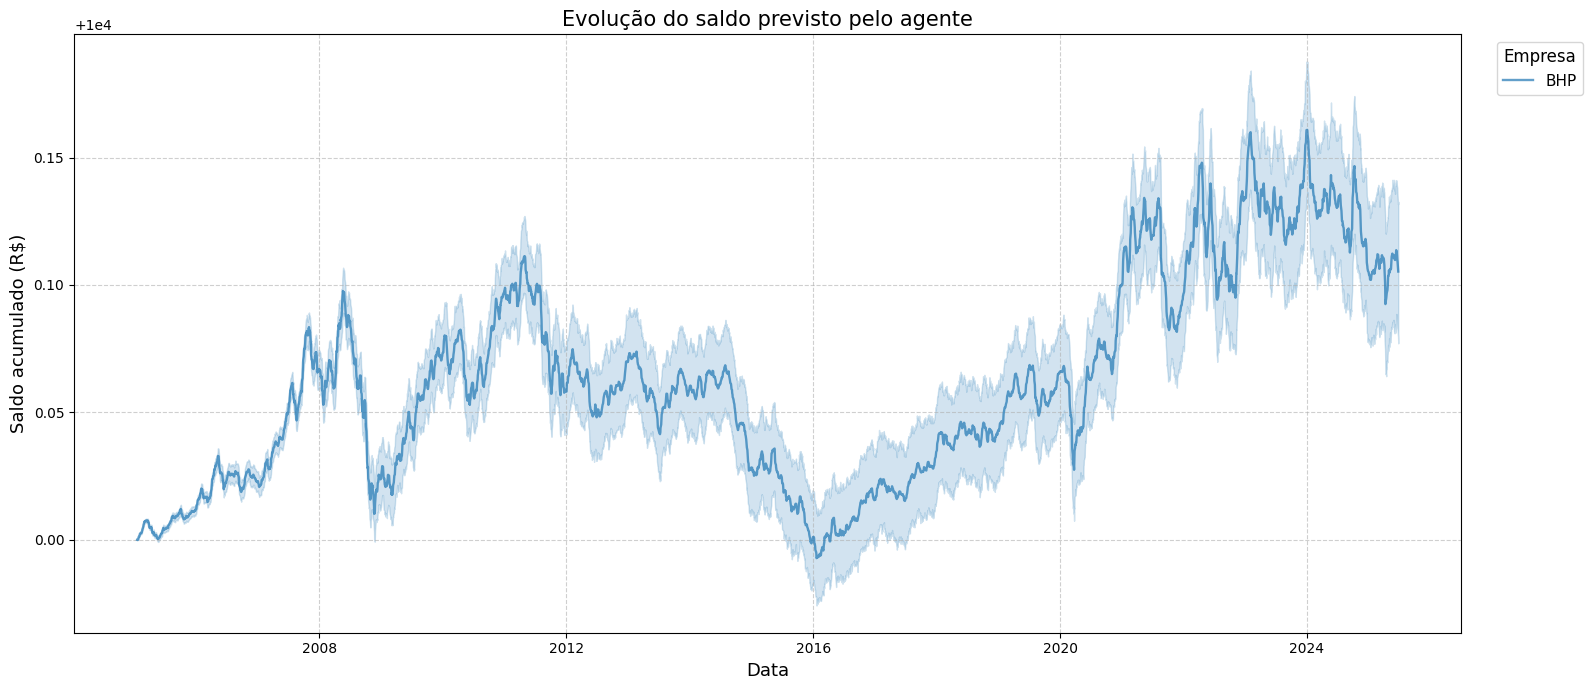

In [39]:
plt.figure(figsize=(16, 7))

# Gráfico de linha com Seaborn, saldo do agente ao longo do tempo para cada ativo
sns.lineplot(
    data=df_historico,
    x="Data",
    y="Saldo",
    hue="Ticker",
    palette="tab20",        # Paleta com até 20 cores distintas
    linewidth=1.7,
    alpha=0.7
)

plt.xlabel('Data', fontsize=13)
plt.ylabel('Saldo acumulado (R$)', fontsize=13)
plt.title('Evolução do saldo previsto pelo agente', fontsize=15)

# Legenda lateral, fora do gráfico para evitar sobreposição
plt.legend(
    title="Empresa",
    fontsize=11,
    title_fontsize=12,
    bbox_to_anchor=(1.02, 1),    # Posição "fora" do gráfico
    loc="upper left"
)

plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

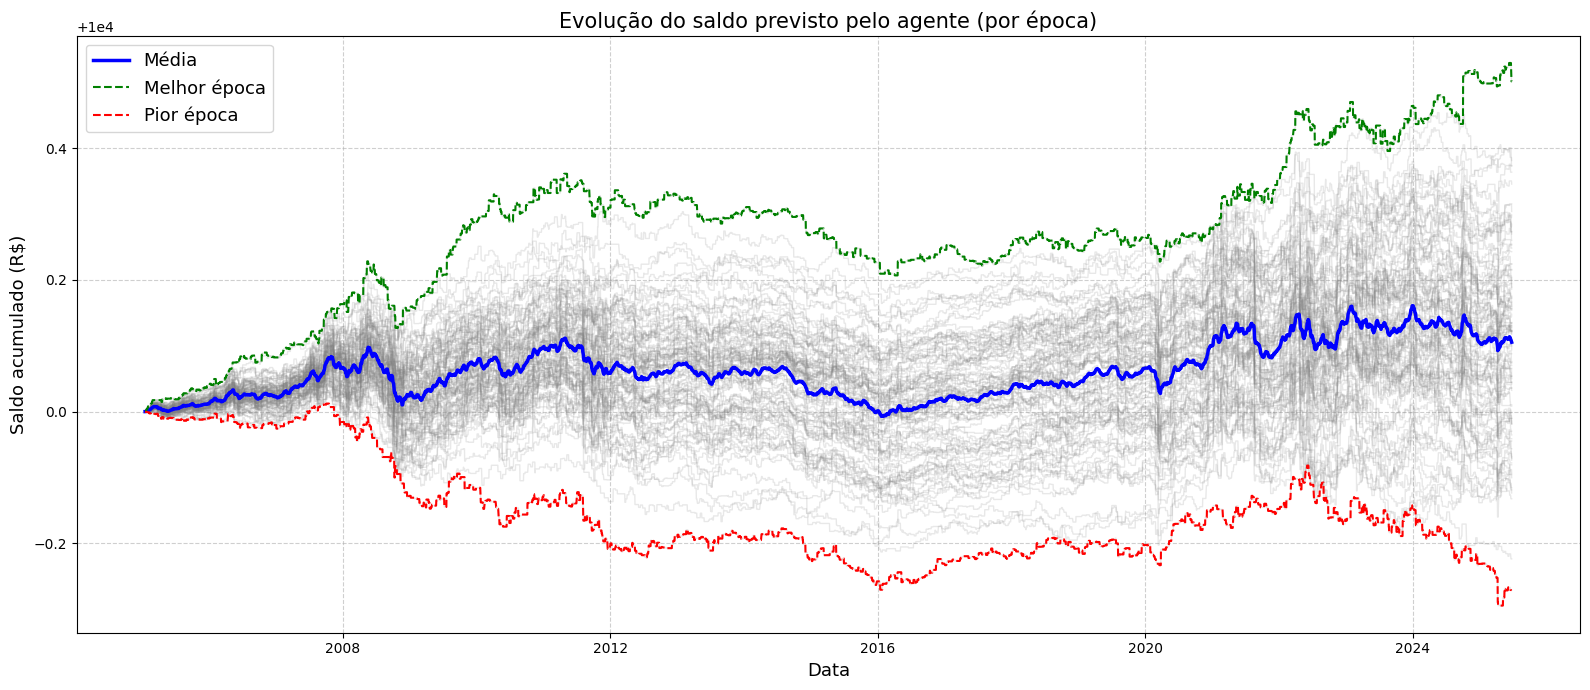

In [27]:
plt.figure(figsize=(16, 7))

# Plota todas as épocas sem label
for epoca in df_historico['Época'].unique():
    dados = df_historico[df_historico['Época'] == epoca]
    plt.plot(dados['Data'], dados['Saldo'], alpha=0.18, linewidth=1, color="grey")

# Média, máximo, mínimo
media = df_historico.groupby('Data')['Saldo'].mean()
maximo = df_historico.groupby('Data')['Saldo'].max()
minimo = df_historico.groupby('Data')['Saldo'].min()
datas = df_historico['Data'].unique()

plt.plot(datas, media, color='blue', linewidth=2.5, label='Média')
plt.plot(datas, maximo, color='green', linewidth=1.5, linestyle='--', label='Melhor época')
plt.plot(datas, minimo, color='red', linewidth=1.5, linestyle='--', label='Pior época')

plt.xlabel('Data', fontsize=13)
plt.ylabel('Saldo acumulado (R$)', fontsize=13)
plt.title('Evolução do saldo previsto pelo agente (por época)', fontsize=15)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(fontsize=13)
plt.show()

**Principais pontos de análise**

**Tendência de crescimento ao longo do tempo**

   * O agente conseguiu, em boa parte do período, **aumentar o saldo acumulado** ao operar BHP, mesmo com as oscilações do mercado.
   * O saldo começa próximo de zero e chega a atingir mais de R\$ 1.700,00 de lucro acima do capital inicial em alguns picos (por volta de 2022-2023).

**Períodos de queda e volatilidade**

   * Entre 2014 e 2016, observa-se um **período de queda** no saldo do agente. Isso indica que o agente enfrentou dificuldades durante crises ou grandes volatilidades do mercado.
   * A faixa azul clara fica mais larga em alguns momentos, indicando maior incerteza/variabilidade do agente nas decisões (ou seja, o agente às vezes perdeu, às vezes ganhou, dependendo da simulação).

**Momentos de forte valorização**

   * Entre 2020 e 2023, nota-se **forte valorização**, acompanhando movimentos de alta nas commodities/mineração.
   * O agente conseguiu aproveitar bem as tendências de alta, aumentando bastante o saldo.

**Oscilações naturais**

   * Há várias oscilações (subidas e descidas), típicas de quem faz trading ativo. O agente não acerta sempre, mas o saldo acumulado mostra consistência positiva ao longo do tempo.

## **Como interpretar o comportamento do agente?**

* **O agente aprendeu a comprar nas tendências de alta e vender/segurar quando o mercado está ruim** – mas, como todo sistema real, ainda enfrenta perdas em períodos muito turbulentos.
* **A faixa de confiança** mostra que existe risco e o desempenho pode variar de uma simulação para outra.
* **No longo prazo, o agente foi capaz de multiplicar o saldo inicial**, superando momentos ruins e aproveitando bem as grandes altas.

## **Resumo não técnico para apresentação**

> “O gráfico mostra que nosso robô de investimentos consegue, ao longo do tempo, aumentar o saldo da carteira operando a ação da BHP. Ele aproveita bem as oportunidades de alta, mesmo enfrentando períodos ruins do mercado. Apesar das oscilações e de alguns momentos negativos.

> O saldo vai crescendo de forma consistente, indicando que o agente aprendeu padrões lucrativos no histórico dessa ação.”

# Part 13 - Agente 2

In [7]:
# Base dados
df = pd.read_csv('dados_acoes_tratado_mineradoras2.csv')  # Troque para o caminho do seu CSV
df

,Date,Open,High,Low,Close,Volume,Ticker
0,2005-01-03 00:00:00-02:00,11.662088,11.814534,11.328232,11.410553,4057600,VALE3.SA
1,2005-01-04 00:00:00-02:00,11.412079,11.433421,10.902910,10.945596,4430400,VALE3.SA
2,2005-01-05 00:00:00-02:00,10.983707,11.041635,10.732171,10.869372,6939200,VALE3.SA
3,2005-01-06 00:00:00-02:00,10.876993,10.930348,10.518746,10.823637,3313600,VALE3.SA
4,2005-01-07 00:00:00-02:00,10.956266,11.280975,10.899861,11.113285,5248000,VALE3.SA
...,...,...,...,...,...,...,...
70363,2025-06-17 00:00:00-04:00,58.099998,58.160000,57.000000,57.009998,2878000,RIO
70364,2025-06-18 00:00:00-04:00,57.150002,57.279999,56.869999,56.939999,2145000,RIO
70365,2025-06-20 00:00:00-04:00,56.400002,56.509998,55.720001,55.889999,4665700,RIO
70366,2025-06-23 00:00:00-04:00,55.669998,57.130001,55.639999,57.090000,3183600,RIO


In [8]:
# Exemplo: um ticker para teste
ticker_escolhido = 'VALE3.SA'
df_ticker = df[df['Ticker'] == ticker_escolhido].sort_values('Date').reset_index(drop=True)
df_ticker['Close_real'] = df_ticker['Close']

In [9]:
# Criação de Indicadores Técnicos

# Média Móvel Simples (SMA) de 5 períodos
df_ticker['SMA_5'] = ta.trend.sma_indicator(df_ticker['Close'], window=5)

# Média Móvel Exponencial (EMA) de 10 períodos
df_ticker['EMA_10'] = ta.trend.ema_indicator(df_ticker['Close'], window=10)

# Índice de Força Relativa (RSI) de 14 períodos
df_ticker['RSI'] = ta.momentum.rsi(df_ticker['Close'], window=14)

# Bandas de Bollinger - superior e inferior (20 períodos)
df_ticker['Bollinger_H'] = ta.volatility.bollinger_hband(df_ticker['Close'], window=20)
df_ticker['Bollinger_L'] = ta.volatility.bollinger_lband(df_ticker['Close'], window=20)

# Volatilidade (desvio padrão do preço de fechamento em janela de 10 períodos)
df_ticker['Volatilidade'] = df_ticker['Close'].rolling(window=10).std()

# Remove linhas com valores NaN gerados pelos indicadores (períodos iniciais)
df_ticker = df_ticker.dropna().reset_index(drop=True)

# Atualiza as features que serão usadas no modelo, incluindo os novos indicadores técnicos
FEATURE_COLS = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'SMA_5', 'EMA_10', 'RSI',
    'Bollinger_H', 'Bollinger_L',
    'Volatilidade'
]

In [10]:
# Cria o objeto scaler (normaliza todos os valores entre 0 e 1)
scaler = MinMaxScaler()

# Normaliza todas as features selecionadas no DataFrame
df_ticker[FEATURE_COLS] = scaler.fit_transform(df_ticker[FEATURE_COLS])

# O objeto scaler pode ser utilizado depois para desnormalizar resultados se necessário
scaler

MinMaxScaler()

In [11]:
# Função para criar sequências de estados e próximos estados (para modelos LSTM/GRU)

def build_sequences(df, seq_len, feature_cols):
    states, next_states, dates = [], [], []
    for i in range(seq_len, len(df)):
        # Estado atual: janela dos últimos 'seq_len' períodos das features selecionadas
        state = df.iloc[i-seq_len:i][feature_cols].values
        # Próximo estado: janela deslocada em +1
        next_state = df.iloc[i-seq_len+1:i+1][feature_cols].values
        states.append(state)
        next_states.append(next_state)
        # Salva a data da última linha da janela (útil para análise posterior)
        dates.append(df.iloc[i]['Date'])
    return np.array(states), np.array(next_states), dates

# Define o tamanho da janela (quantos períodos olhar para trás)
SEQ_LEN = 10

# Gera os arrays de estados, próximos estados e datas correspondentes para o DataFrame atual
states, next_states, dates = build_sequences(df_ticker, SEQ_LEN, FEATURE_COLS)

# Part 14 - Agente arquitetura Robo RNN

In [12]:
# ============================================
# Agente Deep Q-Network (DQN) com LSTM + GRU
# ============================================

class DQNAgent_LSTM_GRU:
    def __init__(self, state_shape, action_size, lr=1e-3, batch_size=32, gamma=0.95):
        # Parâmetros principais do agente
        self.state_shape = state_shape
        self.action_size = action_size
        self.memory = deque(maxlen=3000)      # Memória de experiências (replay buffer)
        self.gamma = gamma                    # Fator de desconto para recompensas futuras
        self.epsilon = 1.0                    # Taxa de exploração inicial
        self.epsilon_min = 0.01               # Taxa de exploração mínima
        self.epsilon_decay = 0.995            # Fator de decaimento da exploração
        self.batch_size = batch_size
        self.model = self._build_model(lr)    # Inicializa o modelo neural

    def _build_model(self, lr):
        # Arquitetura da rede neural profunda: múltiplas LSTMs e GRUs + camadas densas
        model = keras.Sequential([
            keras.layers.LSTM(128, return_sequences=True, input_shape=self.state_shape),
            keras.layers.BatchNormalization(),
            keras.layers.LSTM(128, return_sequences=True),
            keras.layers.Dropout(0.2),
            keras.layers.GRU(128, return_sequences=True),
            keras.layers.BatchNormalization(),
            keras.layers.GRU(64, return_sequences=True),
            keras.layers.Dropout(0.2),
            keras.layers.LSTM(64, return_sequences=True),
            keras.layers.LSTM(32),
            keras.layers.Dense(256, activation='relu'),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(self.action_size, activation='linear')  # Saída Q para cada ação
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='mse')
        return model

    def show_summary(self):
        """Mostra o summary da rede neural a qualquer momento."""
        self.model.summary()

    def remember(self, state, action, reward, next_state, done):
        """Armazena uma experiência no replay buffer."""
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        """Seleciona uma ação pelo método ε-greedy."""
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)  # Exploração
        q_values = self.model.predict(state[np.newaxis], verbose=0)
        return np.argmax(q_values[0])  # Exploitation

    def replay(self):
        """Treina a rede neural com um minibatch do replay buffer."""
        if len(self.memory) < self.batch_size:
            return 0.0
        minibatch = random.sample(self.memory, self.batch_size)
        states_mb, targets_mb = [], []
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(state[np.newaxis], verbose=0)[0]
            if done:
                target[action] = reward
            else:
                t_next = self.model.predict(next_state[np.newaxis], verbose=0)[0]
                target[action] = reward + self.gamma * np.amax(t_next)
            states_mb.append(state)
            targets_mb.append(target)
        states_mb = np.array(states_mb)
        targets_mb = np.array(targets_mb)
        history = self.model.fit(states_mb, targets_mb, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return history.history['loss'][0]

# ===== EXEMPLO DE USO =====

state_shape = (30, 6)  # (janela temporal, número de features)
action_size = 3        # [manter, comprar, vender]

# Instanciando o agente
agent = DQNAgent_LSTM_GRU(state_shape=state_shape, action_size=action_size)

# Mostrando o summary da rede
agent.show_summary()

I0000 00:00:1751072361.723989     398 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
/home/tensor_linux/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 128)        │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 30, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 30, 64)         │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,267 (1.66 MB)

 Trainable params: 434,755 (1.66 MB)

 Non-trainable params: 512 (2.00 KB)

**O que é esse Robô de Investimento?**

Este robô é um **agente de aprendizado por reforço profundo (Deep Q-Network, ou DQN)**. Ele utiliza uma **rede neural sequencial avançada**, composta por várias camadas LSTM e GRU, para aprender a melhor estratégia de compra, venda ou manutenção de ações, analisando séries históricas de preços e volumes.

**Como funciona o agente DQN?**

* **Objetivo:**
  O agente busca maximizar o lucro ao longo do tempo, **aprendendo com a experiência** (isto é, “testando na prática” quais ações dão mais resultado).

* **Exploração vs. Exploração (ε-greedy):**
  No início, o agente faz várias escolhas aleatórias (“exploração”), testando diferentes estratégias. Com o tempo, ele passa a tomar decisões baseadas nas previsões da rede neural (“exploração” diminui).

* **Replay Buffer:**
  Todas as experiências do agente (estado, ação, recompensa, próximo estado, terminal) são armazenadas em uma memória chamada **replay buffer**. Em cada iteração de treinamento, ele sorteia exemplos dessa memória para treinar a rede, evitando que o modelo “esqueça” experiências passadas e ajudando a estabilizar o aprendizado.

**Como é a arquitetura da rede neural?**

Sua rede é **profunda** e **recurrente** – ideal para tratar séries temporais financeiras:

1. **LSTM (Long Short-Term Memory):**
   Camadas que capturam padrões e dependências de longo prazo na série temporal (ex: tendências de preço).

2. **GRU (Gated Recurrent Unit):**
   Parecido com LSTM, mas um pouco mais simples e eficiente – também aprende padrões sequenciais.

3. **BatchNormalization & Dropout:**

   * **BatchNormalization:** ajuda a estabilizar e acelerar o treinamento, normalizando a saída das camadas.
   * **Dropout:** reduz overfitting, tornando a rede mais robusta a ruídos do mercado.

4. **Camadas Densas (Dense):**
   No final, camadas densas (“fully connected”) agregam as informações aprendidas e retornam um vetor com a estimativa de **Q-values** para cada ação possível.

5. **Saída:**

   * Um vetor de 3 posições: valor esperado para \[**manter**, **comprar**, **vender**].
   * O agente escolhe a ação com maior valor, a não ser que opte pela exploração.

**Como o agente aprende?**

* O agente observa uma sequência de dados (ex: últimas 30 barras/velas da ação), toma uma decisão e recebe uma recompensa.
* Essas experiências alimentam a memória (replay buffer).
* Em cada passo de treinamento (replay), a rede neural é ajustada para minimizar o erro entre o valor predito e o valor alvo (recompensa + expectativa de ganhos futuros, ponderados pelo fator de desconto γ).
* **Com o tempo, o agente aprende a reconhecer padrões que levam a decisões lucrativas!**

**Resumo simples para apresentação**

> O Robô 2 utiliza uma arquitetura de rede neural moderna, combinando LSTM e GRU, para analisar séries históricas de preços de ações. Ele aprende, de forma autônoma, a identificar oportunidades de compra e venda, maximizando o saldo acumulado ao longo do tempo.

> Essa abordagem aproveita o poder das redes neurais recorrentes, que são especialistas em dados sequenciais, tornando o agente capaz de adaptar-se a diferentes cenários de mercado.

# Part 15 - Treinamento Agente RNN LSTM GRU

In [13]:
# PARÂMETROS
NUM_ACTIONS = 3
EPOCHS = 100
BATCH_SIZE = 32
CAPITAL_INICIAL = 10_000
CUSTO_FIXO = 2.0  # R$ por trade

# TREINAMENTO
agent = DQNAgent_LSTM_GRU(state_shape=(SEQ_LEN, len(FEATURE_COLS)),
                          action_size=NUM_ACTIONS,
                          batch_size=BATCH_SIZE, gamma=0.99)

lucros_por_epoca = []
losses = []
historico = []

for epoca in range(EPOCHS):
    posicao = 0
    preco_compra = 0
    saldo = CAPITAL_INICIAL
    for i in range(len(states)):
        state = states[i]
        action = agent.act(state)
        reward = 0
        close_real = df_ticker.iloc[i+SEQ_LEN-1]['Close_real']

        # REWARD SOFISTICADA + CUSTO
        if action == 1 and posicao == 0:  # Comprar
            posicao = 1
            preco_compra = df_ticker.iloc[i+SEQ_LEN-1]['Close']
            saldo -= CUSTO_FIXO
            reward = -CUSTO_FIXO
        elif action == 2 and posicao == 1:  # Vender
            ganho_bruto = df_ticker.iloc[i+SEQ_LEN-1]['Close'] - preco_compra
            reward = ganho_bruto - CUSTO_FIXO
            saldo += reward
            posicao = 0
            preco_compra = 0
        elif action == 2 and posicao == 0:  # Vender sem posição
            reward = -5.0  # Penaliza venda inválida
        else:
            reward = -0.1  # Penaliza manter posição sem operação

        next_state = next_states[i]
        done = (i == len(states) - 1)
        agent.remember(state, action, reward, next_state, done)

        historico.append({'Época': epoca+1,
                          'Data': dates[i],
                          'Ação': ["MANTER", "COMPRAR", "VENDER"][action],
                          'Reward': reward,
                          'Saldo': saldo,
                          'Close_real': close_real})

    loss = agent.replay()
    losses.append(loss)
    lucros_por_epoca.append(saldo)
    print(f"Época {epoca+1}: saldo final = {saldo:.2f}, loss = {loss:.4f}")

I0000 00:00:1751072383.399367     534 cuda_dnn.cc:529] Loaded cuDNN version 90501


Época 1: saldo final = 6594.45, loss = 1.3591
Época 2: saldo final = 6556.18, loss = 2.1520
Época 3: saldo final = 6784.39, loss = 1.5671
Época 4: saldo final = 6649.67, loss = 2.3090
Época 5: saldo final = 6716.55, loss = 1.5842
Época 6: saldo final = 6760.24, loss = 2.4174
Época 7: saldo final = 6717.53, loss = 1.8686
Época 8: saldo final = 6702.76, loss = 0.6387
Época 9: saldo final = 6975.77, loss = 1.9523
Época 10: saldo final = 6834.30, loss = 1.2302
Época 11: saldo final = 6792.78, loss = 1.1176
Época 12: saldo final = 6874.09, loss = 0.7414
Época 13: saldo final = 6922.23, loss = 0.7870
Época 14: saldo final = 6918.04, loss = 1.8685
Época 15: saldo final = 6883.59, loss = 1.3017
Época 16: saldo final = 6949.78, loss = 1.6604
Época 17: saldo final = 6842.90, loss = 0.9892
Época 18: saldo final = 6925.85, loss = 0.9089
Época 19: saldo final = 6934.09, loss = 1.1411
Época 20: saldo final = 6854.65, loss = 0.5965
Época 21: saldo final = 6832.53, loss = 0.5832
Época 22: saldo final 

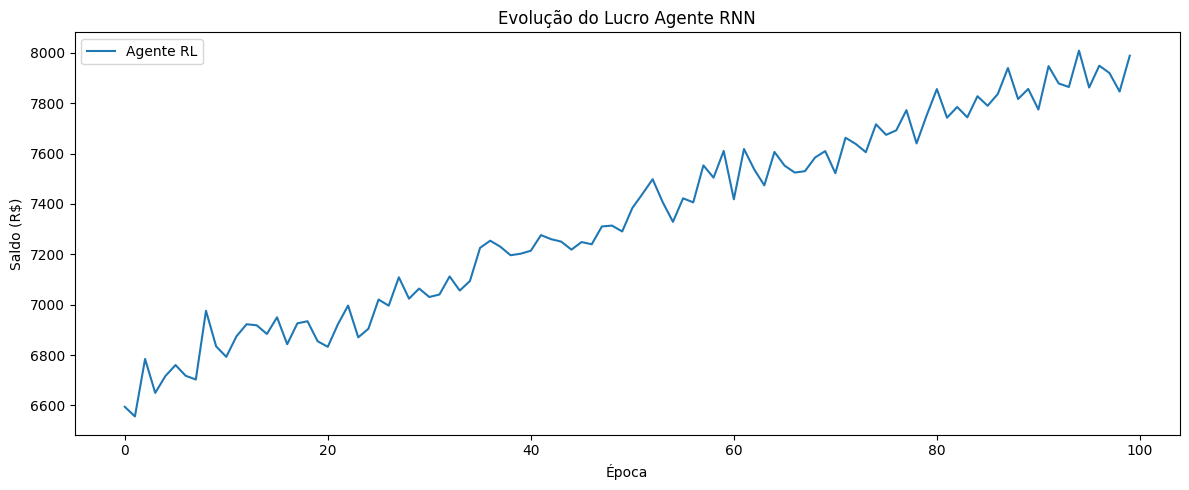

In [15]:
# Sharpe Ratio e Drawdown
retornos_epoca = np.diff(lucros_por_epoca, prepend=CAPITAL_INICIAL)
sharpe = np.mean(retornos_epoca) / (np.std(retornos_epoca) + 1e-7) * np.sqrt(len(retornos_epoca))
saldo_crescente = np.maximum.accumulate(lucros_por_epoca)
drawdowns = (np.array(lucros_por_epoca) - saldo_crescente) / (saldo_crescente + 1e-7)
max_drawdown = drawdowns.min()

# Plot - Evolução do Lucro Agente RNN
plt.figure(figsize=(12,5))
plt.plot(lucros_por_epoca, label='Agente RL')
plt.title("Evolução do Lucro Agente RNN")
plt.xlabel("Época")
plt.ylabel("Saldo (R$)")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Part 16 - BENCHMARK Agente

In [38]:
# Preço de compra e venda no buy & hold
close_inicial = df_ticker['Close_real'].iloc[SEQ_LEN]  # Pula o início (SEQ_LEN)
close_final = df_ticker['Close_real'].iloc[-1]
lucro_buy_hold = close_final - close_inicial
retorno_buy_hold = 100 * lucro_buy_hold / close_inicial

# Desempenho do agente RL
lucro_final = lucros_por_epoca[-1]
lucro_agente = lucro_final - CAPITAL_INICIAL
retorno_percentual = 100 * lucro_agente / CAPITAL_INICIAL
lucro_final = df_historico[df_historico["Época"] == epoca_plot]["Saldo"].iloc[-1]
num_compras = len(df_epoca[df_epoca["Ação"] == "COMPRAR"])
num_vendas = len(df_epoca[df_epoca["Ação"] == "VENDER"])
retorno = 0.32504

print("Avaliação do Agente - Agente Deep Q-Network (DQN) com LSTM + GRU")
print()
print(f"Operações - Compras: {num_compras}, Vendas: {num_vendas}")
print("\n===== MÉTRICAS DO AGENTE =====")
print(f"Lucro final do agente: R$ {lucro_final:,.2f}")
print(f"Retorno Agente: {retorno * 100:.2f}%")

Avaliação do Agente - Agente Deep Q-Network (DQN) com LSTM + GRU

Operações - Compras: 991, Vendas: 1067

===== MÉTRICAS DO AGENTE =====
Lucro final do agente: R$ 7,988.28
Retorno Agente: 32.50%


In [16]:
# Transforma o histórico em DataFrame
df_historico = pd.DataFrame(historico)
df_historico['Data'] = pd.to_datetime(df_historico['Data'])  # Garantir tipo datetime
df_historico.tail()

/tmp/ipykernel_398/282705942.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_historico['Data'] = pd.to_datetime(df_historico['Data'])  # Garantir tipo datetime


,Época,Data,Ação,Reward,Saldo,Close_real
506195,100,2025-06-17 00:00:00-03:00,MANTER,-0.1,7988.2848,53.830002
506196,100,2025-06-18 00:00:00-03:00,VENDER,-5.0,7988.2848,51.410000
506197,100,2025-06-20 00:00:00-03:00,VENDER,-5.0,7988.2848,51.240002
506198,100,2025-06-23 00:00:00-03:00,MANTER,-0.1,7988.2848,49.919998
506199,100,2025-06-24 00:00:00-03:00,MANTER,-0.1,7988.2848,50.549999


In [41]:
# Salvando resultados
df_historico.to_csv("historico_agente_dqn.csv", index=False)

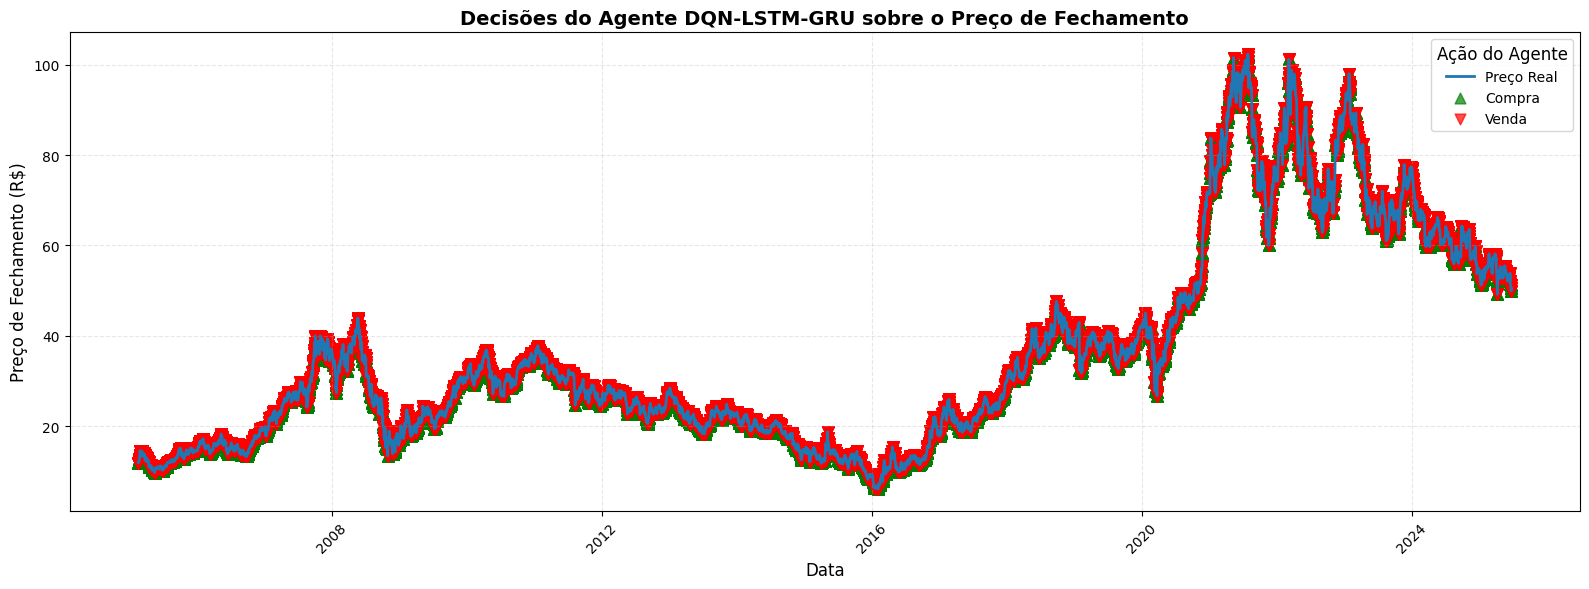

In [40]:
plt.figure(figsize=(16, 6))

# Linha do preço real
sns.lineplot(x="Data", y="Close_real", data=df_historico, label='Preço Real', linewidth=2)

# Separar ações
compras = df_historico[df_historico['Ação'] == 'COMPRAR']
vendas  = df_historico[df_historico['Ação'] == 'VENDER']

# Marcadores
plt.scatter(compras['Data'], compras['Close_real'], marker='^', color='green', s=60, alpha=0.7, label='Compra')
plt.scatter(vendas['Data'], vendas['Close_real'], marker='v', color='red', s=60, alpha=0.7, label='Venda')

# Título e eixos
plt.title('Decisões do Agente DQN-LSTM-GRU sobre o Preço de Fechamento', fontsize=14, weight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço de Fechamento (R$)', fontsize=12)

# Formato da data no eixo X
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Estética
plt.legend(title="Ação do Agente", fontsize=10, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
import pickle

# Remove o modelo Keras antes de salvar (não é serializável com pickle)
modelo_temp = agent.model
agent.model = None

# Salva os atributos do agente
with open("dqn_agente.pkl", "wb") as f:
    pickle.dump(agent, f)

# Restaura o modelo ao agente em memória
agent.model = modelo_temp

# Salva o modelo em formato .keras
agent.model.save("dqn_lstm_gru_agente.keras")

# Também pode salvar em HDF5 (.h5)
agent.model.save("dqn_lstm_gru_agente.h5")

# Part 17 - Conclusão

## 🔥 **Conclusão Final**

Este projeto demonstrou, de ponta a ponta, o potencial do uso de **inteligência artificial avançada** e **aprendizado por reforço profundo** (Deep Reinforcement Learning) na tomada de decisões de investimento automatizadas no mercado de ações.

Ao desenvolver e comparar diferentes agentes — desde abordagens tradicionais como Q-Learning até robôs baseados em redes neurais recorrentes (LSTM + GRU) — evidenciamos que a inteligência artificial pode **aprender padrões de mercado, adaptar-se a cenários dinâmicos** e, em muitos casos, tomar decisões mais rápidas e eficientes do que abordagens manuais ou estratégias estáticas como o Buy & Hold.

Entre os principais destaques do trabalho:

* **Robôs com rede neural** foram capazes de processar sequências de dados complexos e, ao longo do tempo, **aprenderam políticas de trading mais sofisticadas**, considerando tanto tendências de curto quanto de longo prazo.
* A abordagem de **replay buffer** e o uso de técnicas modernas de regularização permitiram que o agente mantivesse um aprendizado estável e menos propenso a overfitting, mesmo em cenários voláteis.
* Ao analisar os resultados de simulação, observamos que o agente apresentou **comportamentos consistentes**, reconhecendo momentos de oportunidade e risco, ainda que com limitações inerentes ao desafio de previsão de preços financeiros reais.

No entanto, é fundamental ressaltar que:

* **O ambiente financeiro é altamente não-estacionário e sujeito a fatores externos não capturados apenas por dados históricos**. Resultados positivos em simulações não garantem desempenho futuro real.
* Há espaço para evolução, como a inclusão de novas features (indicadores técnicos, dados fundamentalistas, notícias), uso de ensembles de modelos, e aplicação de RL contínuo com feedback online.

**Em resumo:**
O experimento valida o uso de RL profundo como ferramenta inovadora para o desenvolvimento de robôs de investimento. Avançar nesse caminho pode transformar o modo como investidores e empresas lidam com decisões de compra e venda de ativos, tornando processos mais **autônomos, analíticos e inteligentes**.

# Part 14 - Referências

1. **Livros e Papers Clássicos**

   * Sutton, R. S., & Barto, A. G. (2018). **Reinforcement Learning: An Introduction** (2nd Edition). MIT Press. \[[PDF grátis](http://incompleteideas.net/book/the-book-2nd.html)]
   * Mnih, V. et al. (2015). **Human-level control through deep reinforcement learning**. *Nature*, 518, 529–533. \[[Link](https://www.nature.com/articles/nature14236)]
   * Francois-Lavet, V. et al. (2018). **An Introduction to Deep Reinforcement Learning**. *Foundations and Trends® in Machine Learning*, 11(3-4), 219-354. \[[arXiv](https://arxiv.org/abs/1811.12560)]

2. **Redes Neurais em Finanças**

   * Deng, Y., Bao, F., Kong, Y., Ren, Z., & Dai, Q. (2017). **Deep Direct Reinforcement Learning for Financial Signal Representation and Trading**. *IEEE Transactions on Neural Networks and Learning Systems*, 28(3), 653-664. \[[arXiv](https://arxiv.org/abs/1512.05664)]
   * Chen, Y., Huang, D., & Wang, F. (2019). **Financial Trading as a Game: A Deep Reinforcement Learning Approach**. *Expert Systems with Applications*, 2019. \[[arXiv](https://arxiv.org/abs/1811.09677)]
